<a href="https://colab.research.google.com/github/oliviagwenny-oss/Gwen-s-Calc-II-Coding-Assignment-0/blob/main/Gwen's_Calc_II_Coding_Assignment_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1:**

In [53]:
import math

def f(x):
  return 1 / math.sqrt(8*x + 1)

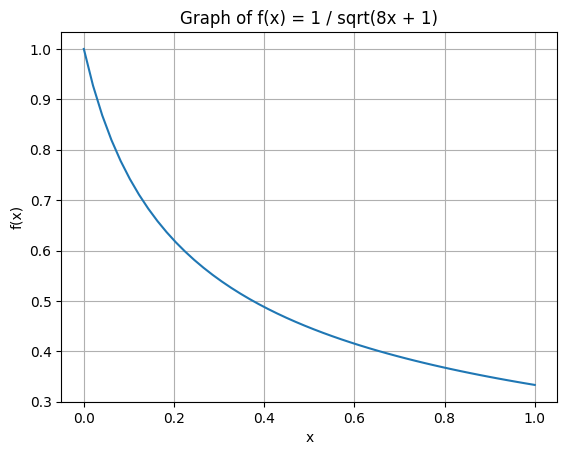

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return 1 / np.sqrt(8*x + 1)

x = np.linspace(0, 1)
y = f(x)

plt.plot(x, y)
plt.title("Graph of f(x) = 1 / sqrt(8x + 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

First I have to calculate the area of one grid square. I will do this by diving the max number shown on both the axes then dividing this number by where the gridmarks mark each unit. Then, I will multiply the x and y values together to get the area of the grid squares. Then, I will count each square and estimate all partical squares. Adding these togther will give me my value.

**1**) 0.2 / 1.0 = 0.02
  0.1 / 1.0 = 0.01
    0.02 * 0.01 = 0.0002

**2**) 6 full squares
    2 square 96% full
    3 square 50% full
    1 square 25% full
    
**3**) 6 + 3(0.50) + 2(0.95) + .25 = 9.65
    9.65 * .0002 = 0.00193

In [55]:
import sympy
from sympy import integrate

def f(x):
  return 1 / sympy.sqrt(8*x + 1)

x = sympy.Symbol('x')
area = integrate(f(x), (x, 0, 1))
print(area)

1/2


**Part 2:**

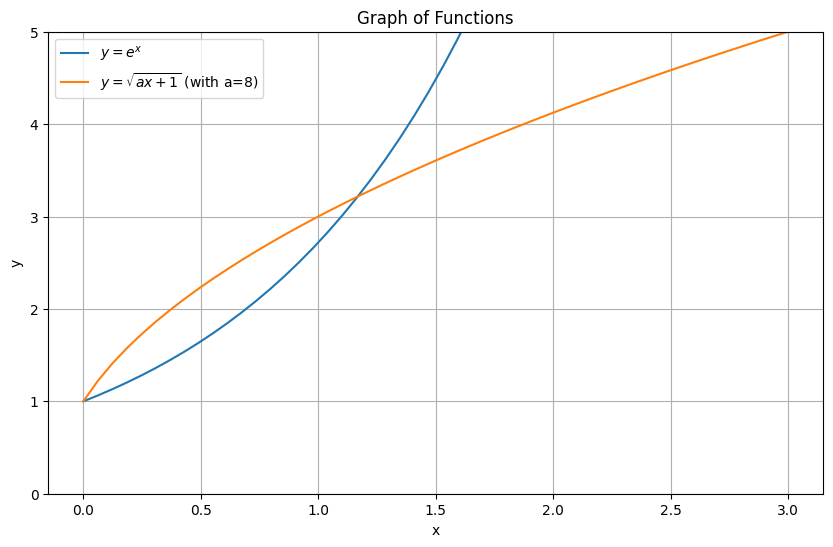

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad

def f1(x):
    return np.exp(x)

def f2(x, a):
    arg = a * x + 1
    return np.sqrt(arg) if arg >= 0 else np.nan

a_val = 8

x_vals = np.linspace(0, 3)

y1_vals = f1(x_vals)
y2_vals = np.array([f2(x, a_val) for x in x_vals])

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1_vals, label=r'$y = e^x$')
plt.plot(x_vals, y2_vals, label=r'$y = \sqrt{{ax+1}}$ (with a={})'.format(a_val))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of Functions')
plt.grid(True)
plt.legend()
plt.ylim(0, 5)
plt.show()


In [57]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import quad

def func_to_solve(x):
    return np.exp(x) - np.sqrt(8*x + 1)

x_guess1 = 0.0
root1 = fsolve(func_to_solve, x_guess1)[0]

x_guess2 = 2.5
root2 = fsolve(func_to_solve, x_guess2)[0]

y1 = np.exp(root1)
y2 = np.exp(root2)

print(f"First intersection point: ({root1:.4f}, {y1:.4f})")
print(f"Second intersection point: ({root2:.4f}, {y2:.4f})")

def f(x):
    return np.exp(x)

def g(x):
    arg = 8 * x + 1
    return np.where(arg >= 0, np.sqrt(arg), np.nan)

def difference_function(x):
    return f(x) - g(x)

initial_guesses = [0.0, 2.5]

def integrand(x):
    return abs(f(x) - g(x))

area, error = quad(integrand, root1, root2)

print(f"Area between the curves: {area:.4f}")

def integrand_volume(x):
    if 8*x + 1 < 0:
        return 0
    return 2 * np.pi * x * (np.sqrt(8*x + 1) - np.exp(x))

volume, error = quad(integrand_volume, root1, root2)

print(f"Volume of the solid of revolution about the y-axis: {volume:.4f}")

First intersection point: (0.0000, 1.0000)
Second intersection point: (1.1683, 3.2166)
Area between the curves: 0.4735
Volume of the solid of revolution about the y-axis: 1.6852


**Part 3:**

In [58]:
from sympy import symbols, log, integrate, diff

x, a = symbols('x a')

integral_n_a = integrate(log(x)**a, x)

print(f"The integral of (lnx)^a dx is: {integral_n_a}")



The integral of (lnx)^a dx is: log(x)**a*uppergamma(a + 1, -log(x))/(-log(x))**a


The reduction method simplifies the integral by reducing a complex power integral to a simpler one. This allows for you to just plug in numbers to the n value until the integral is solvable when x = 0 or 1.

In [59]:
from sympy import symbols, log, diff, simplify

x, n = symbols('x n')

rhs_term1 = x * (log(x)**n)

derivative_rhs_term1 = diff(rhs_term1, x)

rhs_term2_derivative = -n * (log(x)**(n-1))

total_derivative = derivative_rhs_term1 + rhs_term2_derivative

simplified_derivative = simplify(total_derivative)

print(f"{simplified_derivative}")

-n*log(x)**(n - 1) + n*log(x)**n/log(x) + log(x)**n


The output of simplified_derivative will be log(x)^n, making the proof true.